<a href="https://colab.research.google.com/github/93gh4ucf/Coursera_Capstone/blob/main/El_Proyecto_Capstone_La_Batalla_de_los_Vecindarios_(PART_II).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd

url = "https://api.foursquare.com/v3/places/search"

params = {
    "query": "restaurantes",
    "ll": "40.7128,-74.0060",
    "radius": 100000,
    "limit": 50  # Ajusta el límite de resultados aquí
}

headers = {
    "accept": "application/json",
    "Authorization": "fsq3gw+9KBnn4pLtTZVAuPmec3yx7z6qgTMEVQEP3yHyI98="
}

response = requests.get(url, params=params, headers=headers)

# Obtener los datos de la respuesta en formato JSON
data = response.json()

# Obtener la lista de lugares encontrados
places = data.get('results', [])

# Crear un DataFrame de pandas con los datos de los lugares
df = pd.DataFrame(places)

# Especificar el nombre del archivo de Excel
nombre_archivo = "resultados_foursquare.xlsx"

# Guardar el DataFrame en un archivo de Excel
df.to_excel(nombre_archivo, index=False)

print("Resultados guardados en el archivo:", nombre_archivo)


Resultados guardados en el archivo: resultados_foursquare.xlsx


In [2]:
# Especificar la ruta y el nombre del archivo de Excel
ruta_archivo = "/content/resultados_foursquare.xlsx"

# Leer el archivo de Excel y cargar los datos en un DataFrame
df = pd.read_excel(ruta_archivo)

# Obtener información general sobre los datos
print("Información general:")
print(df.info())

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fsq_id          50 non-null     object
 1   categories      50 non-null     object
 2   chains          50 non-null     object
 3   distance        50 non-null     int64 
 4   geocodes        50 non-null     object
 5   link            50 non-null     object
 6   location        50 non-null     object
 7   name            50 non-null     object
 8   related_places  50 non-null     object
 9   timezone        50 non-null     object
dtypes: int64(1), object(9)
memory usage: 4.0+ KB
None


In [3]:
# Obtener estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
           distance
count     50.000000
mean    4882.780000
std     6006.120831
min      498.000000
25%     1825.500000
50%     3716.500000
75%     5471.750000
max    37598.000000


In [4]:
# Obtener la lista de variables/columnas del DataFrame
variables = df.columns.tolist()
print("\nVariables disponibles:")
print(variables)


Variables disponibles:
['fsq_id', 'categories', 'chains', 'distance', 'geocodes', 'link', 'location', 'name', 'related_places', 'timezone']


Análisis Exploratorio

In [5]:
import requests
import pandas as pd
from pandas import json_normalize

url = "https://api.foursquare.com/v3/places/search"

params = {
    "query": "restaurantes",
    "ll": "40.7128,-74.0060",
    "radius": 100000,
    "limit": 50
}

headers = {
    "accept": "application/json",
    "Authorization": "fsq3gw+9KBnn4pLtTZVAuPmec3yx7z6qgTMEVQEP3yHyI98="
}

response = requests.get(url, params=params, headers=headers)

# Obtener los datos de la respuesta en formato JSON
data = response.json()

# Obtener la lista de lugares encontrados
places = data.get('results', [])

# Crear un DataFrame de pandas con los datos de los lugares
df = pd.DataFrame(places)

# Extraer los datos de la columna "location" en un DataFrame separado
location_data = json_normalize(df["location"])

# Extraer los datos de la columna "geocodes" en un DataFrame separado
geocodes_data = json_normalize(df["geocodes"])

# Extraer los datos de la columna "categories" en un DataFrame separado
categories = df["categories"].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

categories_data = pd.DataFrame(categories.tolist(), columns=["category_" + str(i+1) for i in range(max(map(len, categories)))])

# Combinar los DataFrames de "location", "geocodes" y "categories" con el DataFrame original
df = pd.concat([df, location_data, geocodes_data, categories_data], axis=1)

# Especificar el nombre del archivo de Excel
nombre_archivo = "resultados_foursquare.xlsx"

# Guardar el DataFrame en un archivo de Excel
df.to_excel(nombre_archivo, index=False)

print("Resultados guardados en el archivo:", nombre_archivo)

Resultados guardados en el archivo: resultados_foursquare.xlsx


In [6]:
# Obtener la lista de variables/columnas del DataFrame
variables = df.columns.tolist()
print("\nVariables disponibles:")
print(variables)


Variables disponibles:
['fsq_id', 'categories', 'chains', 'distance', 'geocodes', 'link', 'location', 'name', 'related_places', 'timezone', 'address', 'census_block', 'country', 'cross_street', 'dma', 'formatted_address', 'locality', 'postcode', 'region', 'address_extended', 'main.latitude', 'main.longitude', 'roof.latitude', 'roof.longitude', 'drop_off.latitude', 'drop_off.longitude', 'category_1', 'category_2', 'category_3']


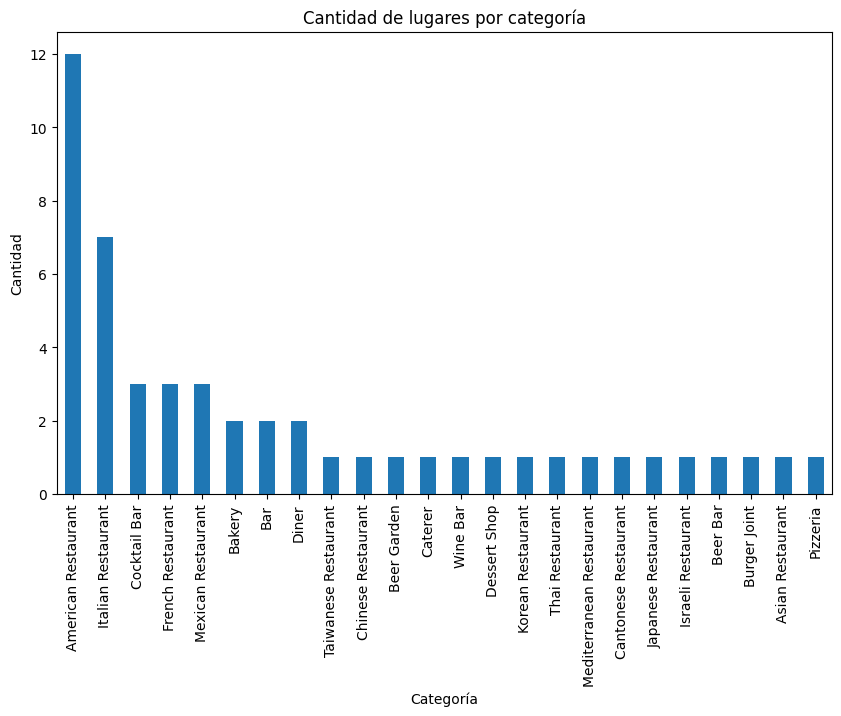

In [7]:
import matplotlib.pyplot as plt

# Contar la cantidad de lugares por categoría
categoria_counts = df['category_1'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
categoria_counts.plot(kind='bar')
plt.title('Cantidad de lugares por categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

Las 10 categorías más comunes:
American Restaurant     12
Italian Restaurant       7
Cocktail Bar             3
French Restaurant        3
Mexican Restaurant       3
Bakery                   2
Bar                      2
Diner                    2
Taiwanese Restaurant     1
Chinese Restaurant       1
Name: category_1, dtype: int64


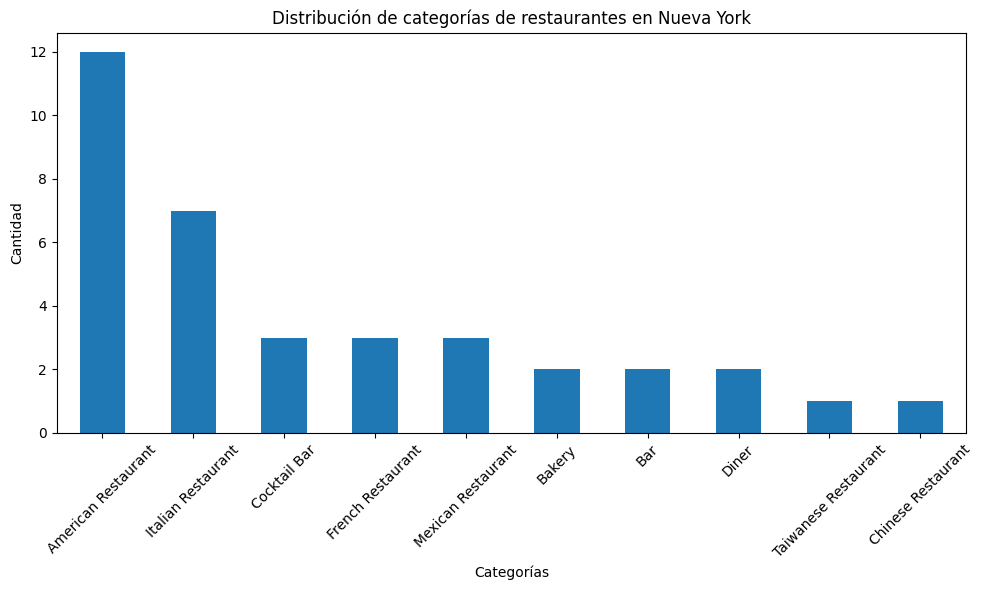

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo de Excel con los datos
nombre_archivo = "resultados_foursquare.xlsx"
df = pd.read_excel(nombre_archivo)

# Obtener la distribución de las categorías
category_counts = df['category_1'].value_counts()

# Mostrar las 10 categorías más comunes
top_10_categories = category_counts.head(10)
print("Las 10 categorías más comunes:")
print(top_10_categories)

# Graficar la distribución de categorías
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar')
plt.xlabel("Categorías")
plt.ylabel("Cantidad")
plt.title("Distribución de categorías de restaurantes en Nueva York")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

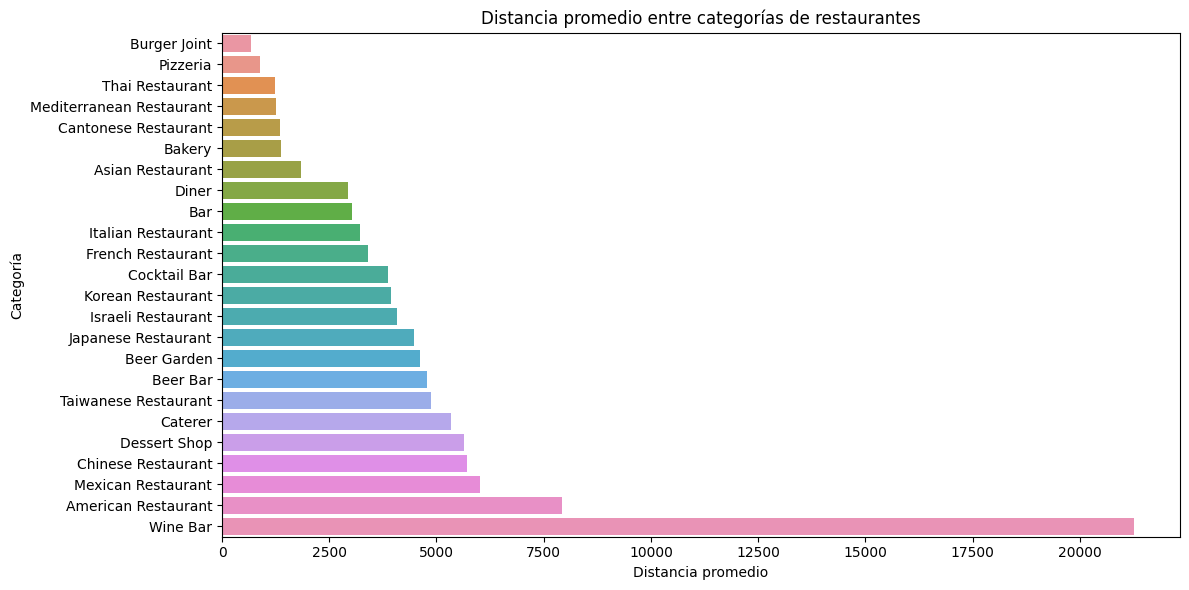

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo de Excel con los datos
nombre_archivo = "resultados_foursquare.xlsx"
df = pd.read_excel(nombre_archivo)

# Filtrar las columnas necesarias
data = df[['category_1', 'distance']]

# Calcular la distancia promedio por categoría
category_distance = data.groupby('category_1')['distance'].mean().reset_index()

# Ordenar las categorías por distancia promedio ascendente
category_distance = category_distance.sort_values('distance', ascending=True)

# Graficar la distancia promedio por categoría
plt.figure(figsize=(12, 6))
sns.barplot(x='distance', y='category_1', data=category_distance)
plt.xlabel('Distancia promedio')
plt.ylabel('Categoría')
plt.title('Distancia promedio entre categorías de restaurantes')
plt.tight_layout()
plt.show()


Las 10 cadenas de restaurantes más comunes:
[]                                                                           46
[{'id': '16d16020-992b-0132-fd75-7a163eb2a6fc', 'name': 'Chick-Fil-A'}]       2
[{'id': '16e2ce50-992b-0132-fd75-7a163eb2a6fc', 'name': 'Panda Express'}]     1
[{'id': 'ab4b00e0-d68a-012e-5619-003048cad9da', 'name': 'Red Lobster'}]       1
Name: chains, dtype: int64


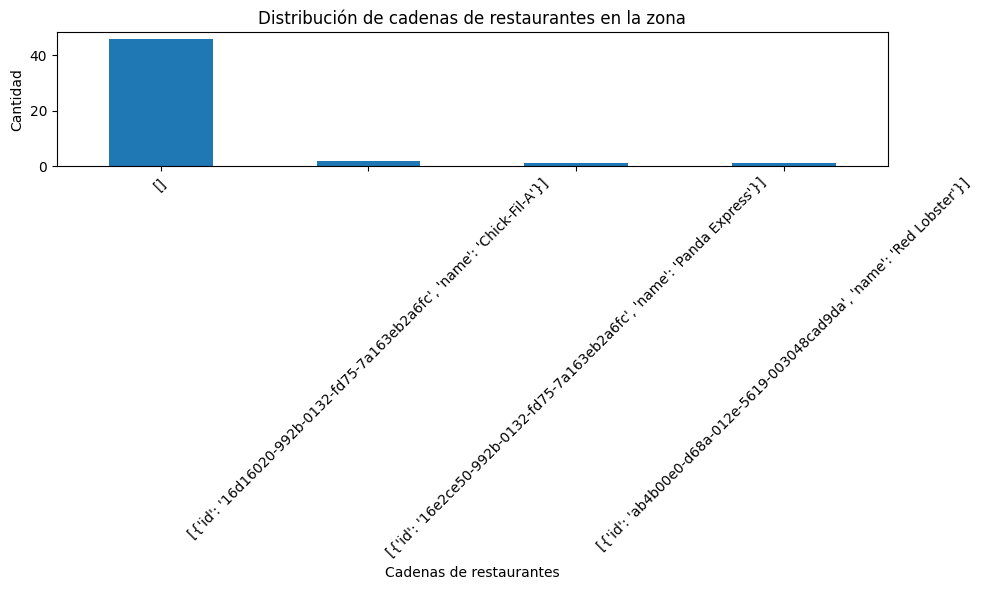

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo de Excel con los datos
nombre_archivo = "resultados_foursquare.xlsx"
df = pd.read_excel(nombre_archivo)

# Obtener la cantidad de cadenas de restaurantes
chains_counts = df['chains'].value_counts()

# Mostrar las cadenas más comunes
top_chains = chains_counts.head(10)
print("Las 10 cadenas de restaurantes más comunes:")
print(top_chains)

# Graficar la distribución de cadenas de restaurantes
plt.figure(figsize=(10, 6))
top_chains.plot(kind='bar')
plt.xlabel("Cadenas de restaurantes")
plt.ylabel("Cantidad")
plt.title("Distribución de cadenas de restaurantes en la zona")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import folium

# Cargar el archivo de Excel con los datos
nombre_archivo = "resultados_foursquare.xlsx"
df = pd.read_excel(nombre_archivo)

# Filtrar las columnas necesarias
data = df[['name', 'address', 'locality', 'postcode', 'region', 'main.latitude', 'main.longitude']]

# Eliminar las filas con valores faltantes en las coordenadas
data = data.dropna(subset=['main.latitude', 'main.longitude'])

# Crear un mapa centrado en Nueva York
mapa = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Agregar marcadores para cada restaurante en el mapa
for index, row in data.iterrows():
    name = row['name']
    address = row['address']
    locality = row['locality']
    postcode = row['postcode']
    region = row['region']
    latitude = row['main.latitude']
    longitude = row['main.longitude']

    popup_text = f"<b>{name}</b><br>{address}, {locality}, {postcode}, {region}"

    marker = folium.Marker([latitude, longitude], popup=popup_text)
    marker.add_to(mapa)

# Mostrar el mapa
mapa

In [12]:
import pandas as pd

# Cargar el archivo de Excel con los datos
nombre_archivo = "resultados_foursquare.xlsx"
df = pd.read_excel(nombre_archivo)

# Obtener la columna de lugares relacionados
related_places = df['related_places']

# Contar la cantidad de lugares de interés cercanos
places_count = related_places.apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)

# Mostrar la cantidad de lugares de interés cercanos
print("Cantidad de lugares de interés cercanos:")
print(places_count.value_counts())

# Ejemplo de lugares de interés cercanos para el primer restaurante
first_restaurant_places = eval(related_places.iloc[0])


Cantidad de lugares de interés cercanos:
0    39
1    10
2     1
Name: related_places, dtype: int64


In [13]:
import numpy as np

# Obtener la cantidad de lugares de interés cercanos
df['num_related_places'] = df['related_places'].apply(lambda x: len(x))

# Calcular la distancia promedio a otros restaurantes
df['avg_distance_to_restaurants'] = df.apply(lambda row: np.mean([row['distance'] for index, row in df.iterrows() if row['category_1'] == 'Restaurant' and index != row.name]), axis=1)

# Obtener la cantidad de restaurantes en la zona
df['num_restaurants_in_area'] = df[df['category_1'] == 'Restaurant'].groupby(['locality', 'postcode'])['fsq_id'].transform('count')

# Imprimir el DataFrame actualizado
print(df)


                      fsq_id  \
0   5e46e2ec5791a10008c55728   
1   5ada32224f0e584592628c1f   
2   57c169e3498e784947e307aa   
3   504b2a9ee4b006c435a465d3   
4   543c7c63498e0a3393da47a2   
5   5e55a57d55d9100008ab6478   
6   3fd66200f964a520aee91ee3   
7   59b4898de1f0aa6d9ec6d507   
8   5a00f3538496ca58fd9e2856   
9   4d9f5a9efc4f721e7e5a9d5f   
10  556f4ef2498ee60139b28c72   
11  5ce5b1f1f5e9d7002c4ad547   
12  569af0e3498ed45804d58a1c   
13  3fd66200f964a52070e91ee3   
14  5c71d51689b06a002c6de87d   
15  5b340e1d2a7ab6002cff9669   
16  4a01d7b8f964a52001711fe3   
17  4a85fd26f964a520f4ff1fe3   
18  637ad5ddda10086976be9199   
19  4f62afe7e4b09b9cd8b354f6   
20  43850280f964a520fd2a1fe3   
21  40f1d480f964a5205b0a1fe3   
22  58195606fa17e5341d8d8e7d   
23  45a7dc66f964a52019411fe3   
24  5e4c841b1485b40007d77e6e   
25  3fd66200f964a52083e61ee3   
26  56a96c6f498e5f93f0a505fd   
27  57acf9af498e6b8d5376c2d4   
28  4b4b90e4f964a5207aa026e3   
29  4f0f47650cd695a0e54cb438   
30  3fd6

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [14]:
# Definir el criterio objetivo
def calcular_variable_objetivo(row):
    # Puedes definir tu propia lógica y ponderación para calcular la variable objetivo
    # Por ejemplo, puedes asignar un puntaje a cada variable y combinarlos según su importancia relativa
    score = row['num_related_places'] * 0.3 + (1 / (row['avg_distance_to_restaurants'] + 1)) * 0.5 + row['num_restaurants_in_area'] * 0.2

    # Puedes establecer un umbral o realizar cualquier transformación adicional según tus necesidades
    # Por ejemplo, si deseas clasificar los restaurantes como "adecuados" o "no adecuados" en función del puntaje obtenido
    if score >= 2.5:
        return 'Adecuado'
    else:
        return 'No adecuado'

# Crear la variable objetivo en el DataFrame
df['variable_objetivo'] = df.apply(calcular_variable_objetivo, axis=1)

# Imprimir el DataFrame actualizado
print(df)


                      fsq_id  \
0   5e46e2ec5791a10008c55728   
1   5ada32224f0e584592628c1f   
2   57c169e3498e784947e307aa   
3   504b2a9ee4b006c435a465d3   
4   543c7c63498e0a3393da47a2   
5   5e55a57d55d9100008ab6478   
6   3fd66200f964a520aee91ee3   
7   59b4898de1f0aa6d9ec6d507   
8   5a00f3538496ca58fd9e2856   
9   4d9f5a9efc4f721e7e5a9d5f   
10  556f4ef2498ee60139b28c72   
11  5ce5b1f1f5e9d7002c4ad547   
12  569af0e3498ed45804d58a1c   
13  3fd66200f964a52070e91ee3   
14  5c71d51689b06a002c6de87d   
15  5b340e1d2a7ab6002cff9669   
16  4a01d7b8f964a52001711fe3   
17  4a85fd26f964a520f4ff1fe3   
18  637ad5ddda10086976be9199   
19  4f62afe7e4b09b9cd8b354f6   
20  43850280f964a520fd2a1fe3   
21  40f1d480f964a5205b0a1fe3   
22  58195606fa17e5341d8d8e7d   
23  45a7dc66f964a52019411fe3   
24  5e4c841b1485b40007d77e6e   
25  3fd66200f964a52083e61ee3   
26  56a96c6f498e5f93f0a505fd   
27  57acf9af498e6b8d5376c2d4   
28  4b4b90e4f964a5207aa026e3   
29  4f0f47650cd695a0e54cb438   
30  3fd6

In [15]:
import numpy as np

# Reemplazar NaN en "num_restaurants_in_area" por cero
df['num_restaurants_in_area'].fillna(0, inplace=True)

# Reemplazar NaN en "avg_distance_to_restaurants" por cero
df['avg_distance_to_restaurants'].fillna(0, inplace=True)

# Definir el criterio objetivo
def calcular_variable_objetivo(row):
    score = row['num_related_places'] * 0.3 + (1 / (row['avg_distance_to_restaurants'] + 1)) * 0.5 + row['num_restaurants_in_area'] * 0.2

    if score >= 2.5:
        return 'Adecuado'
    else:
        return 'No adecuado'

# Crear la variable objetivo en el DataFrame
df['variable_objetivo'] = df.apply(calcular_variable_objetivo, axis=1)

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Seleccionar las variables predictoras y la variable objetivo
X = df[['num_related_places', 'avg_distance_to_restaurants', 'num_restaurants_in_area']]
y = df['variable_objetivo']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Bosques Aleatorios
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred))
print (df)

              precision    recall  f1-score   support

 No adecuado       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

                      fsq_id  \
0   5e46e2ec5791a10008c55728   
1   5ada32224f0e584592628c1f   
2   57c169e3498e784947e307aa   
3   504b2a9ee4b006c435a465d3   
4   543c7c63498e0a3393da47a2   
5   5e55a57d55d9100008ab6478   
6   3fd66200f964a520aee91ee3   
7   59b4898de1f0aa6d9ec6d507   
8   5a00f3538496ca58fd9e2856   
9   4d9f5a9efc4f721e7e5a9d5f   
10  556f4ef2498ee60139b28c72   
11  5ce5b1f1f5e9d7002c4ad547   
12  569af0e3498ed45804d58a1c   
13  3fd66200f964a52070e91ee3   
14  5c71d51689b06a002c6de87d   
15  5b340e1d2a7ab6002cff9669   
16  4a01d7b8f964a52001711fe3   
17  4a85fd26f964a520f4ff1fe3   
18  637ad5ddda10086976be9199   
19  4f62afe7e4b09b9cd8b354f6   
20  43850280f964a520fd2a1fe3   
21  40f1d480f964a5205b0

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Seleccionar las variables predictoras y la variable objetivo
X = df[['num_related_places', 'avg_distance_to_restaurants', 'num_restaurants_in_area', 'categories', 'chains']]
y = df['variable_objetivo']

# Convertir variables categóricas en variables dummy
X = pd.get_dummies(X, columns=['categories', 'chains'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Bosques Aleatorios
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 No adecuado       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

